In [1]:
!pip install pyathena

!pip install pyarrow
!pip install s3fs

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/tensorflow_p36/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/tensorflow_p36/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/tensorflow_p36/bin/python -m pip install --upgrade pip' command.


In [2]:
import pyarrow.parquet as pq
import s3fs
fs = s3fs.S3FileSystem()

In [3]:
dataset = pq.ParquetDataset('s3://datalake-curated-datasets-907317471167-us-east-1-gismq40/year=2020/month=12/day=14/hour=19', filesystem=fs)
table = dataset.read()
df = table.to_pandas()
df = df.sort_values(['unit_number', 'cycle'])

In [4]:
df.head()

filename  unit_number  failure_cycle  cycle     op_1    op_2  \
77121   train_FD001.txt            1            191      1  -0.0007 -0.0004   
95307   train_FD003.txt            1            258      1  -0.0005  0.0004   
132437  train_FD002.txt            1            148      1  34.9983  0.8400   
150804  train_FD004.txt            1            320      1  42.0049  0.8400   
77122   train_FD001.txt            1            190      2   0.0019 -0.0003   

         op_3  sensor_measurement_1  sensor_measurement_2  \
77121   100.0                518.67                641.82   
95307   100.0                518.67                642.36   
132437  100.0                449.44                555.32   
150804  100.0                445.00                549.68   
77122   100.0                518.67                642.15   

        sensor_measurement_3  ...  sensor_measurement_12  \
77121                1589.70  ...                 521.66   
95307                1583.23  ...                 522.31   
132437               1358.61  ...                 183.06   
150804               1343.43  ...                 129.78   
77122                1591.82  ...                 522.28   

        sensor_measurement_13  sensor_measurement_14  sensor_measurement_15  \
77121                 2388.02                8138.62                 8.4195   
95307                 2388.01                8145.32                 8.4246   
132437                2387.72                8048.56                 9.3461   
150804                2387.99                8074.83                 9.3335   
77122                 2388.07                8131.49                 8.4318   

        sensor_measurement_16  sensor_measurement_17  sensor_measurement_18  \
77121                    0.03                    392                   2388   
95307                    0.03                    391                   2388   
132437                   0.02                    334                   2223   
150804                   0.02                    330                   2212   
77122                    0.03                    392                   2388   

        sensor_measurement_19  sensor_measurement_20  sensor_measurement_21  
77121                   100.0                  39.06                23.4190  
95307                   100.0                  39.11                23.3537  
132437                  100.0                  14.73                 8.8071  
150804                  100.0                  10.62                 6.3670  
77122                   100.0                  39.00                23.4236  

[5 rows x 28 columns]

In [5]:
df.shape

(160359, 28)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df.describe().T

count         mean         std        min  \
unit_number            160359.0   105.553758   72.867325     1.0000   
failure_cycle          160359.0   122.331338   83.538146     0.0000   
cycle                  160359.0   123.331338   83.538146     1.0000   
op_1                   160359.0    17.211973   16.527988    -0.0087   
op_2                   160359.0     0.410004    0.367938    -0.0006   
op_3                   160359.0    95.724344   12.359044    60.0000   
sensor_measurement_1   160359.0   485.840890   30.420388   445.0000   
sensor_measurement_2   160359.0   597.361022   42.478516   535.4800   
sensor_measurement_3   160359.0  1467.035653  118.175261  1242.6700   
sensor_measurement_4   160359.0  1260.956434  136.300073  1023.7700   
sensor_measurement_5   160359.0     9.894999    4.265554     3.9100   
sensor_measurement_6   160359.0    14.424935    6.443922     5.6700   
sensor_measurement_7   160359.0   359.729968  174.133835   136.1700   
sensor_measurement_8   160359.0  2273.829707  142.426613  1914.7200   
sensor_measurement_9   160359.0  8677.553696  374.657454  7984.5100   
sensor_measurement_10  160359.0     1.153705    0.142103     0.9300   
sensor_measurement_11  160359.0    44.212049    3.426342    36.0400   
sensor_measurement_12  160359.0   338.789821  164.193480   128.3100   
sensor_measurement_13  160359.0  2349.645243  111.167242  2027.5700   
sensor_measurement_14  160359.0  8088.950972   80.623257  7845.7800   
sensor_measurement_15  160359.0     9.054747    0.751581     8.1563   
sensor_measurement_16  160359.0     0.025185    0.004997     0.0200   
sensor_measurement_17  160359.0   360.698801   31.021430   302.0000   
sensor_measurement_18  160359.0  2273.754039  142.513114  1915.0000   
sensor_measurement_19  160359.0    98.389146    4.656270    84.9300   
sensor_measurement_20  160359.0    25.942709   11.691422    10.1600   
sensor_measurement_21  160359.0    15.565700    7.015067     6.0105   

                              25%        50%        75%        max  
unit_number              44.00000    89.0000   164.0000   260.0000  
failure_cycle            56.00000   113.0000   172.0000   542.0000  
cycle                    57.00000   114.0000   173.0000   543.0000  
op_1                      0.00130    19.9981    35.0015    42.0080  
op_2                      0.00020     0.6200     0.8400     0.8420  
op_3                    100.00000   100.0000   100.0000   100.0000  
sensor_measurement_1    449.44000   489.0500   518.6700   518.6700  
sensor_measurement_2    549.96000   605.9300   642.3400   645.1100  
sensor_measurement_3   1357.36000  1492.8100  1586.5900  1616.9100  
sensor_measurement_4   1126.83000  1271.7400  1402.2000  1441.4900  
sensor_measurement_5      5.48000     9.3500    14.6200    14.6200  
sensor_measurement_6      8.00000    13.6600    21.6100    21.6100  
sensor_measurement_7    175.71000   341.6900   553.2900   570.8100  
sensor_measurement_8   2212.12000  2319.3700  2388.0500  2388.6400  
sensor_measurement_9   8334.77000  8764.2000  9055.8500  9244.5900  
sensor_measurement_10     1.02000     1.0900     1.3000     1.3200  
sensor_measurement_11    42.01000    44.9300    47.3400    48.5300  
sensor_measurement_12   164.79000   321.6900   521.3400   537.4900  
sensor_measurement_13  2387.97000  2388.0700  2388.1600  2390.4900  
sensor_measurement_14  8070.53000  8118.5900  8139.4100  8293.7200  
sensor_measurement_15     8.43925     9.0301     9.3442    11.0669  
sensor_measurement_16     0.02000     0.0300     0.0300     0.0300  
sensor_measurement_17   332.00000   367.0000   392.0000   400.0000  
sensor_measurement_18  2212.00000  2319.0000  2388.0000  2388.0000  
sensor_measurement_19   100.00000   100.0000   100.0000   100.0000  
sensor_measurement_20    14.33000    24.9200    38.8200    39.8900  
sensor_measurement_21     8.60130    14.9535    23.2946    23.9505

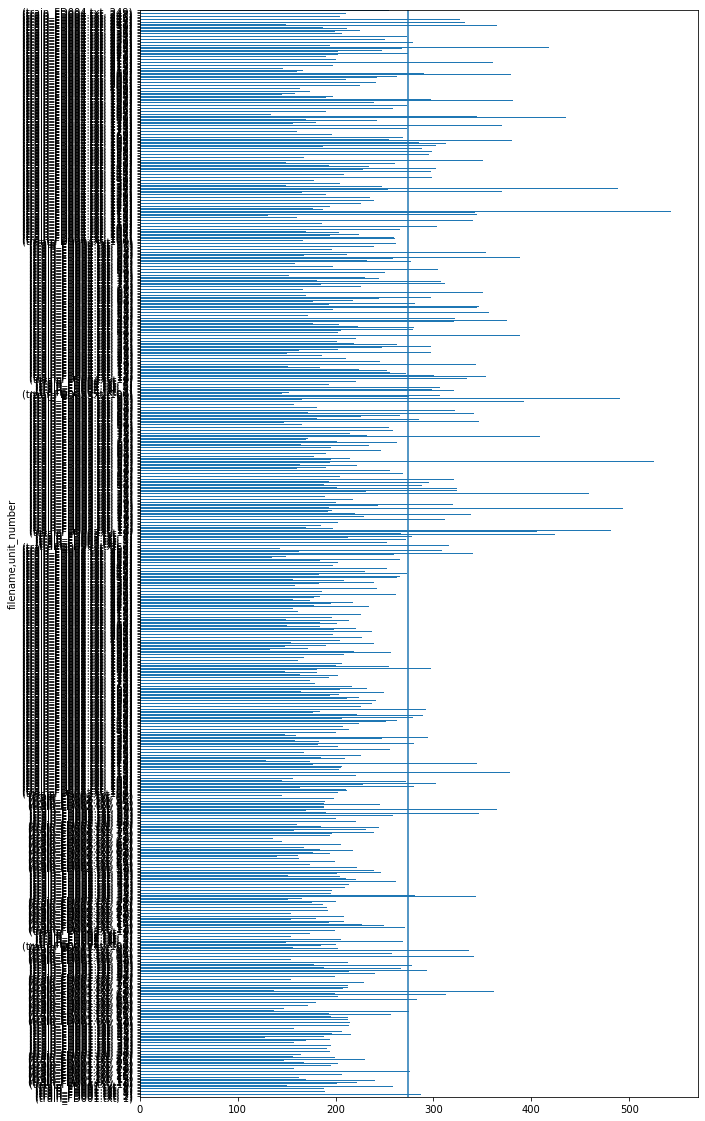

In [8]:
fig, ax = plt.subplots(figsize=(10, 20))
_ = df.groupby(['filename', 'unit_number']).cycle.max().plot.barh(ax=ax)
_ = plt.axvline(x=df.groupby('unit_number').cycle.max().mean())

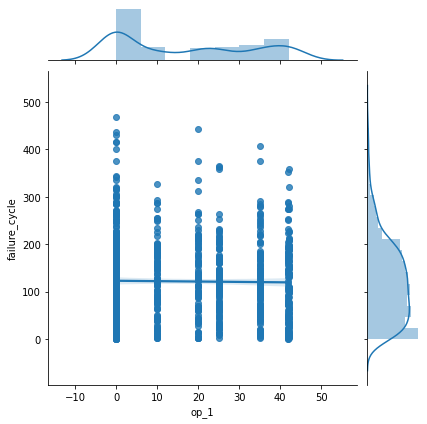

In [9]:
sns.jointplot(x='op_1', y='failure_cycle', data=df.sample(1000), kind='reg')

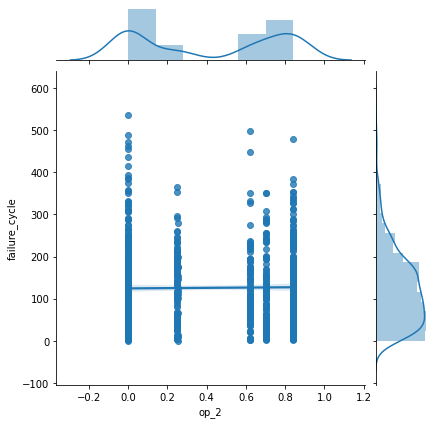

In [10]:
sns.jointplot(x='op_2', y='failure_cycle', data=df.sample(1000), kind='reg')

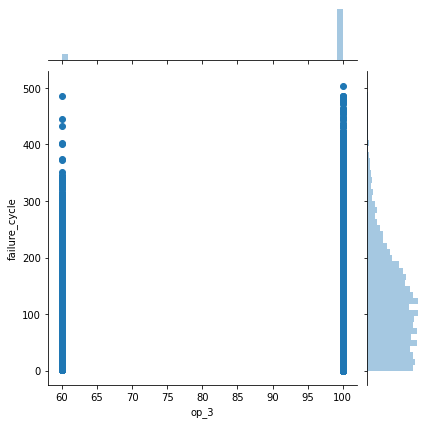

In [11]:
sns.jointplot(x='op_3', y='failure_cycle', data=df.sample(10000))

In [12]:
import matplotlib.pyplot as plt

In [13]:
ddf = df.set_index(['filename', 'unit_number', 'cycle']).sort_index()

In [14]:
ddf.loc[['train_FD001.txt', ...]]

failure_cycle    op_1    op_2   op_3  \
filename        unit_number cycle                                         
train_FD001.txt 1           1                191 -0.0007 -0.0004  100.0   
                            2                190  0.0019 -0.0003  100.0   
                            3                189 -0.0043  0.0003  100.0   
                            4                188  0.0007  0.0000  100.0   
                            5                187 -0.0019 -0.0002  100.0   
...                                          ...     ...     ...    ...   
                100         196                4 -0.0004 -0.0003  100.0   
                            197                3 -0.0016 -0.0005  100.0   
                            198                2  0.0004  0.0000  100.0   
                            199                1 -0.0011  0.0003  100.0   
                            200                0 -0.0032 -0.0005  100.0   

                                   sensor_measurement_1  sensor_measurement_2  \
filename        unit_number cycle                                               
train_FD001.txt 1           1                    518.67                641.82   
                            2                    518.67                642.15   
                            3                    518.67                642.35   
                            4                    518.67                642.35   
                            5                    518.67                642.37   
...                                                 ...                   ...   
                100         196                  518.67                643.49   
                            197                  518.67                643.54   
                            198                  518.67                643.42   
                            199                  518.67                643.23   
                            200                  518.67                643.85   

                                   sensor_measurement_3  sensor_measurement_4  \
filename        unit_number cycle                                               
train_FD001.txt 1           1                   1589.70               1400.60   
                            2                   1591.82               1403.14   
                            3                   1587.99               1404.20   
                            4                   1582.79               1401.87   
                            5                   1582.85               1406.22   
...                                                 ...                   ...   
                100         196                 1597.98               1428.63   
                            197                 1604.50               1433.58   
                            198                 1602.46               1428.18   
                            199                 1605.26               1426.53   
                            200                 1600.38               1432.14   

                                   sensor_measurement_5  sensor_measurement_6  \
filename        unit_number cycle                                               
train_FD001.txt 1           1                     14.62                 21.61   
                            2                     14.62                 21.61   
                            3                     14.62                 21.61   
                            4                     14.62                 21.61   
                            5                     14.62                 21.61   
...                                                 ...                   ...   
                100         196                   14.62                 21.61   
                            197                   14.62                 21.61   
                            198                   14.62                 21.61   
                            199                   14.62     

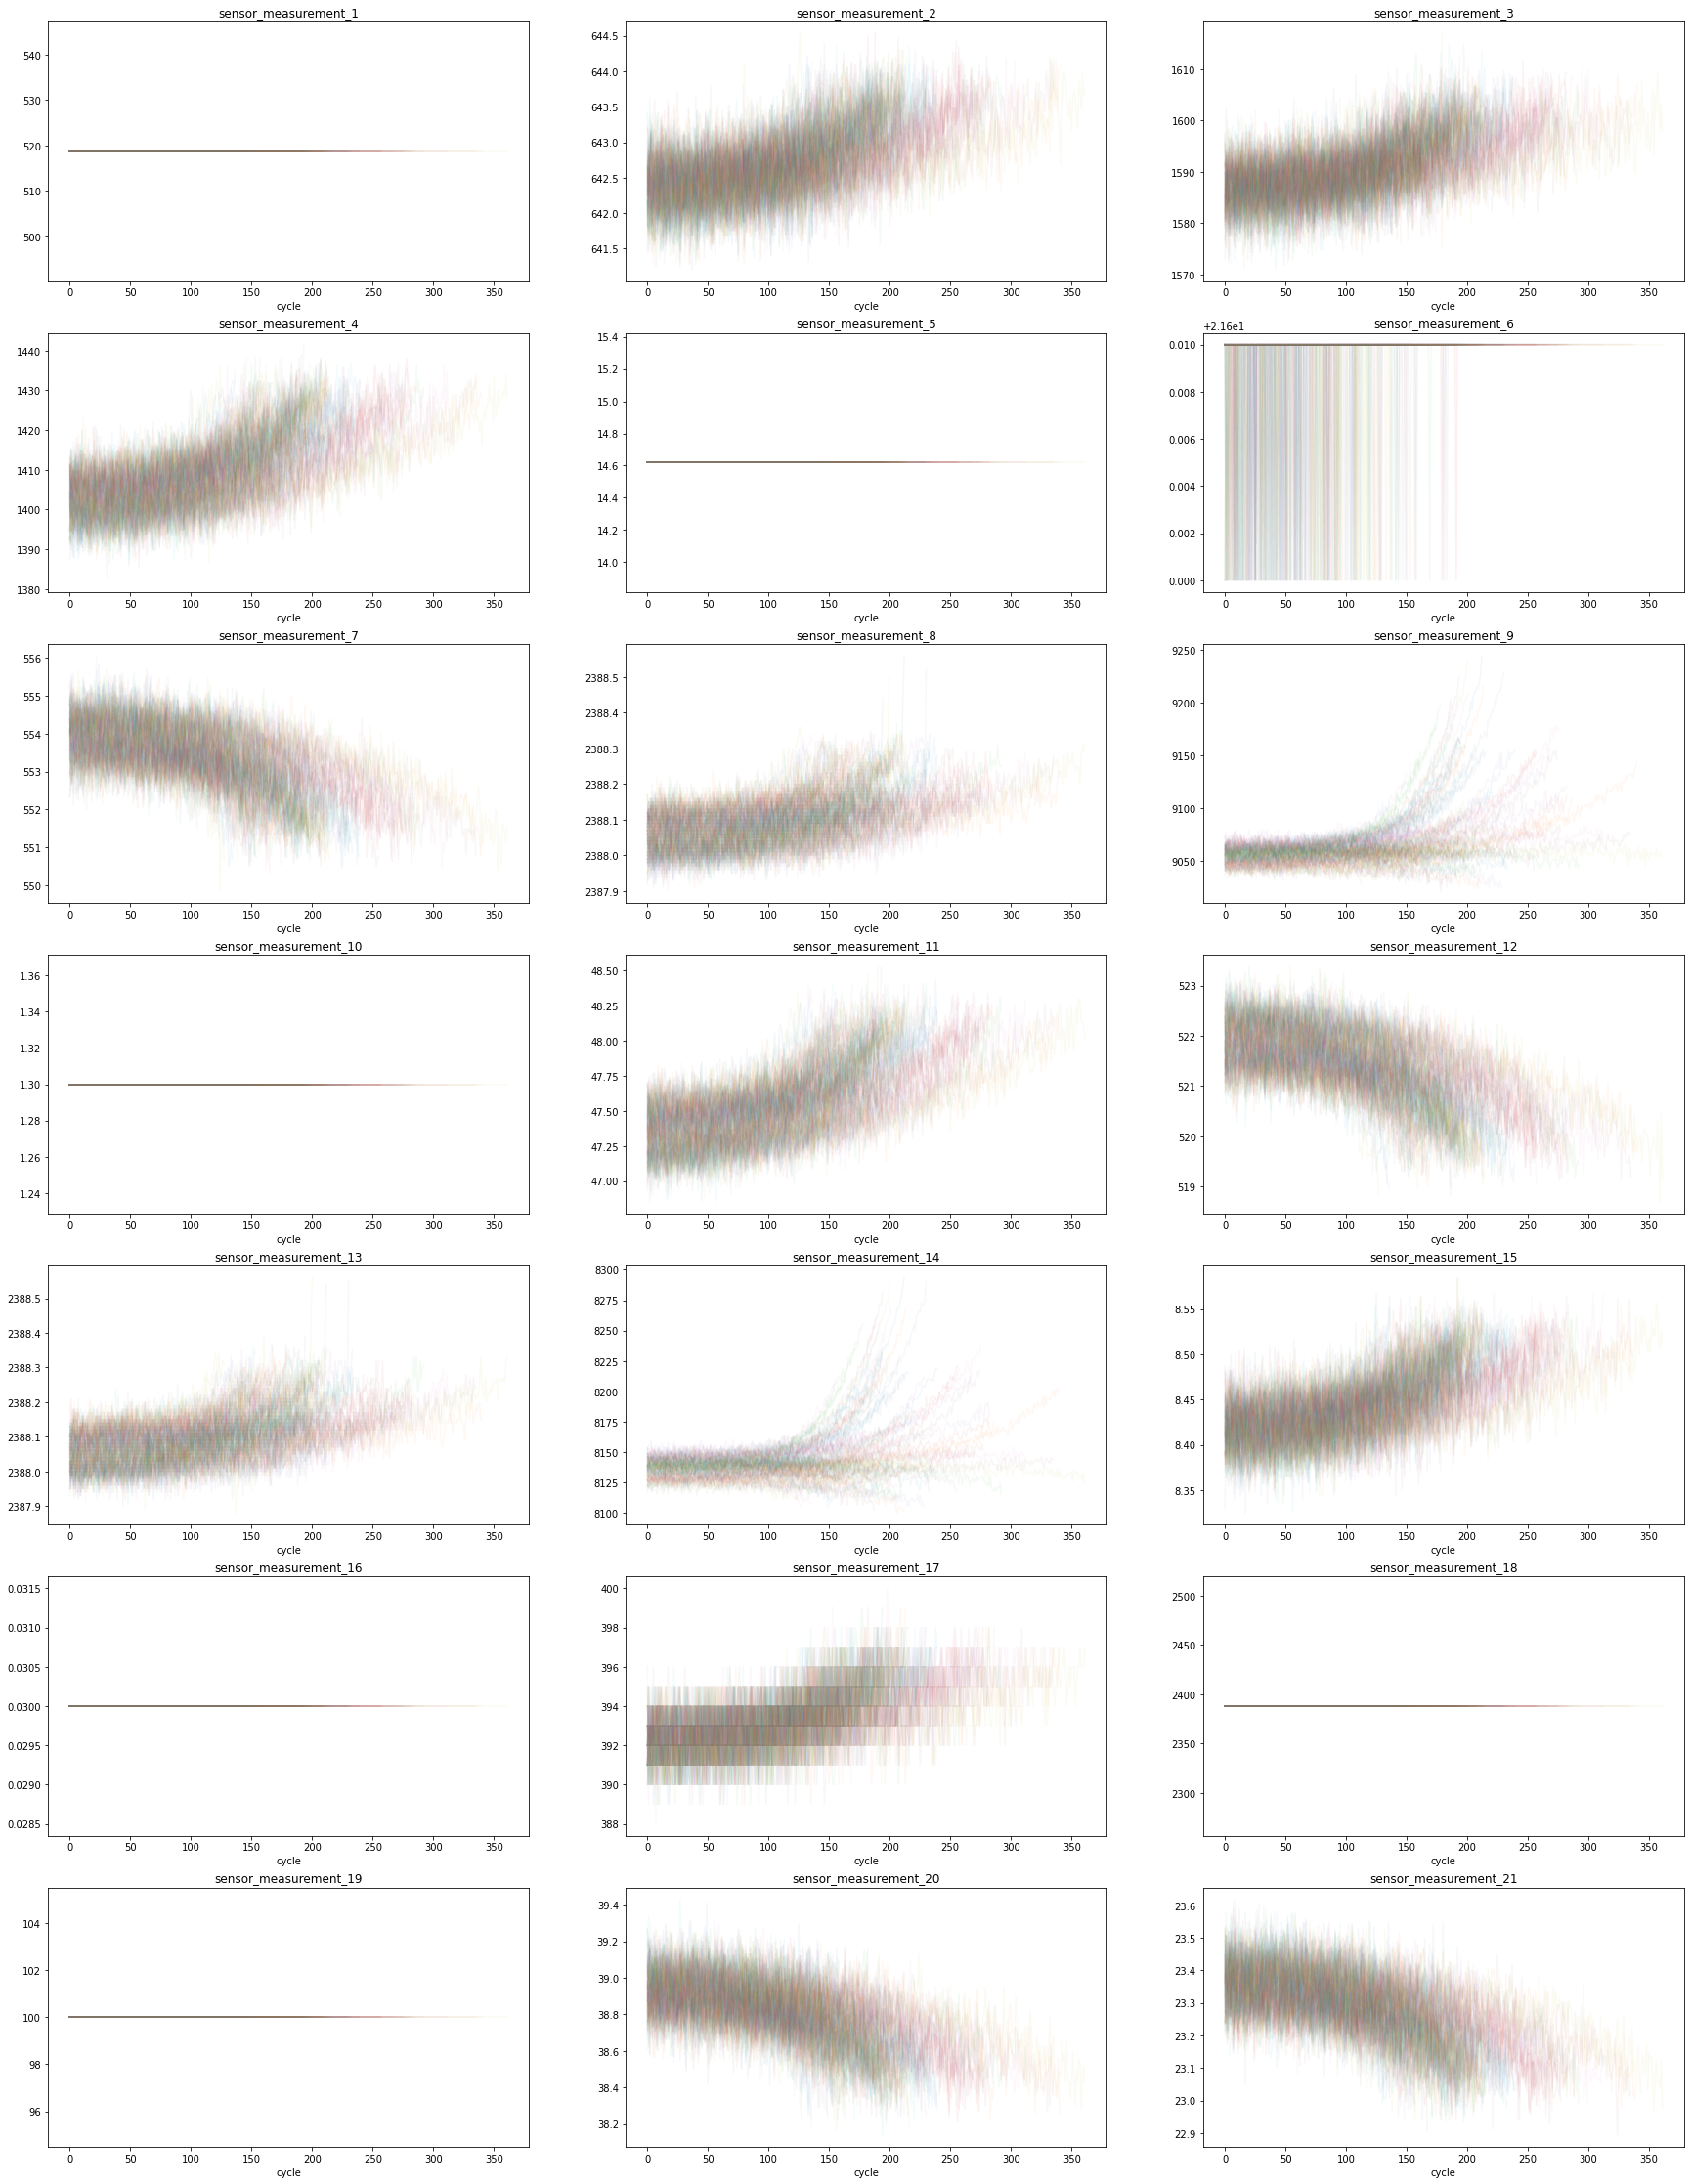

In [15]:
fig, axes = plt.subplots(7, 3, figsize=(30, 40))
axes = axes.ravel()
for i, a in zip(range(1, 22), axes):
    column = 'sensor_measurement_' + str(i)
    _ = a.plot(ddf.loc[['train_FD001.txt', ...], column].unstack(level=[0, 1]).values, alpha=.05)
    a.set_title(column)
    a.set_xlabel('cycle')

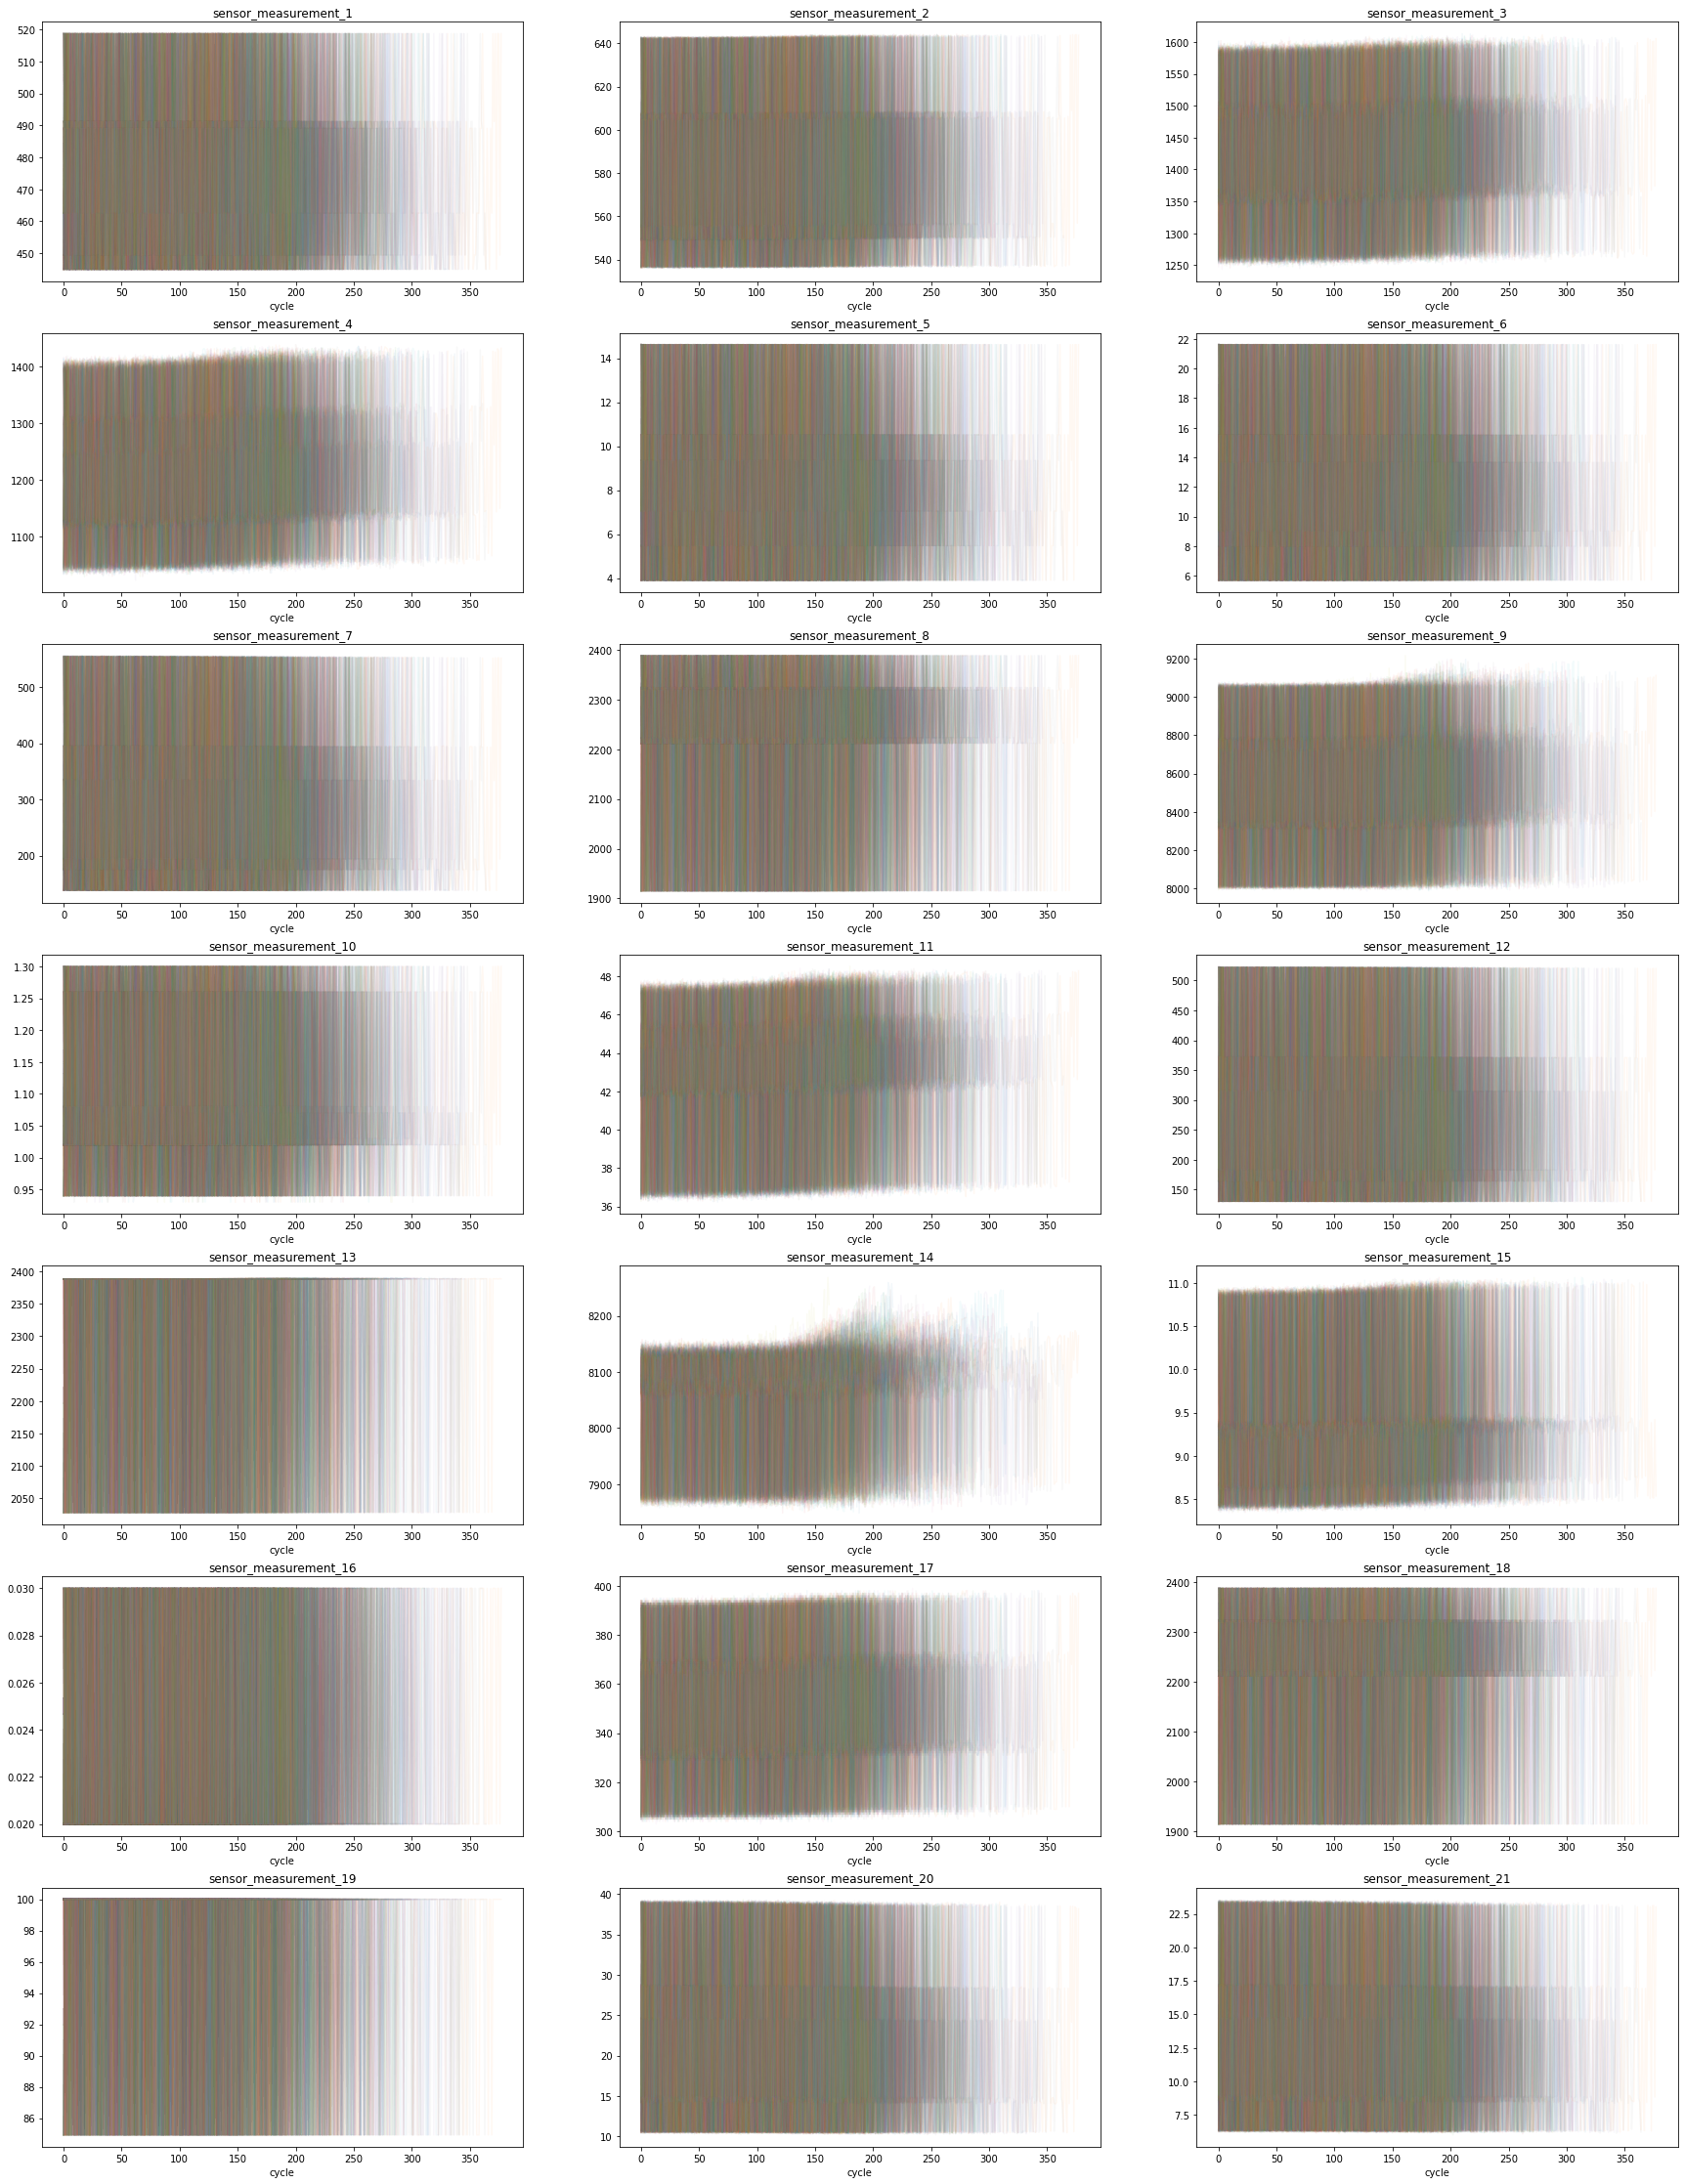

In [16]:
fig, axes = plt.subplots(7, 3, figsize=(30, 40))
axes = axes.ravel()
for i, a in zip(range(1, 22), axes):
    column = 'sensor_measurement_' + str(i)
    _ = a.plot(ddf.loc[['train_FD002.txt', ...], column].unstack(level=[0, 1]).values, alpha=.05)
    a.set_title(column)
    a.set_xlabel('cycle')

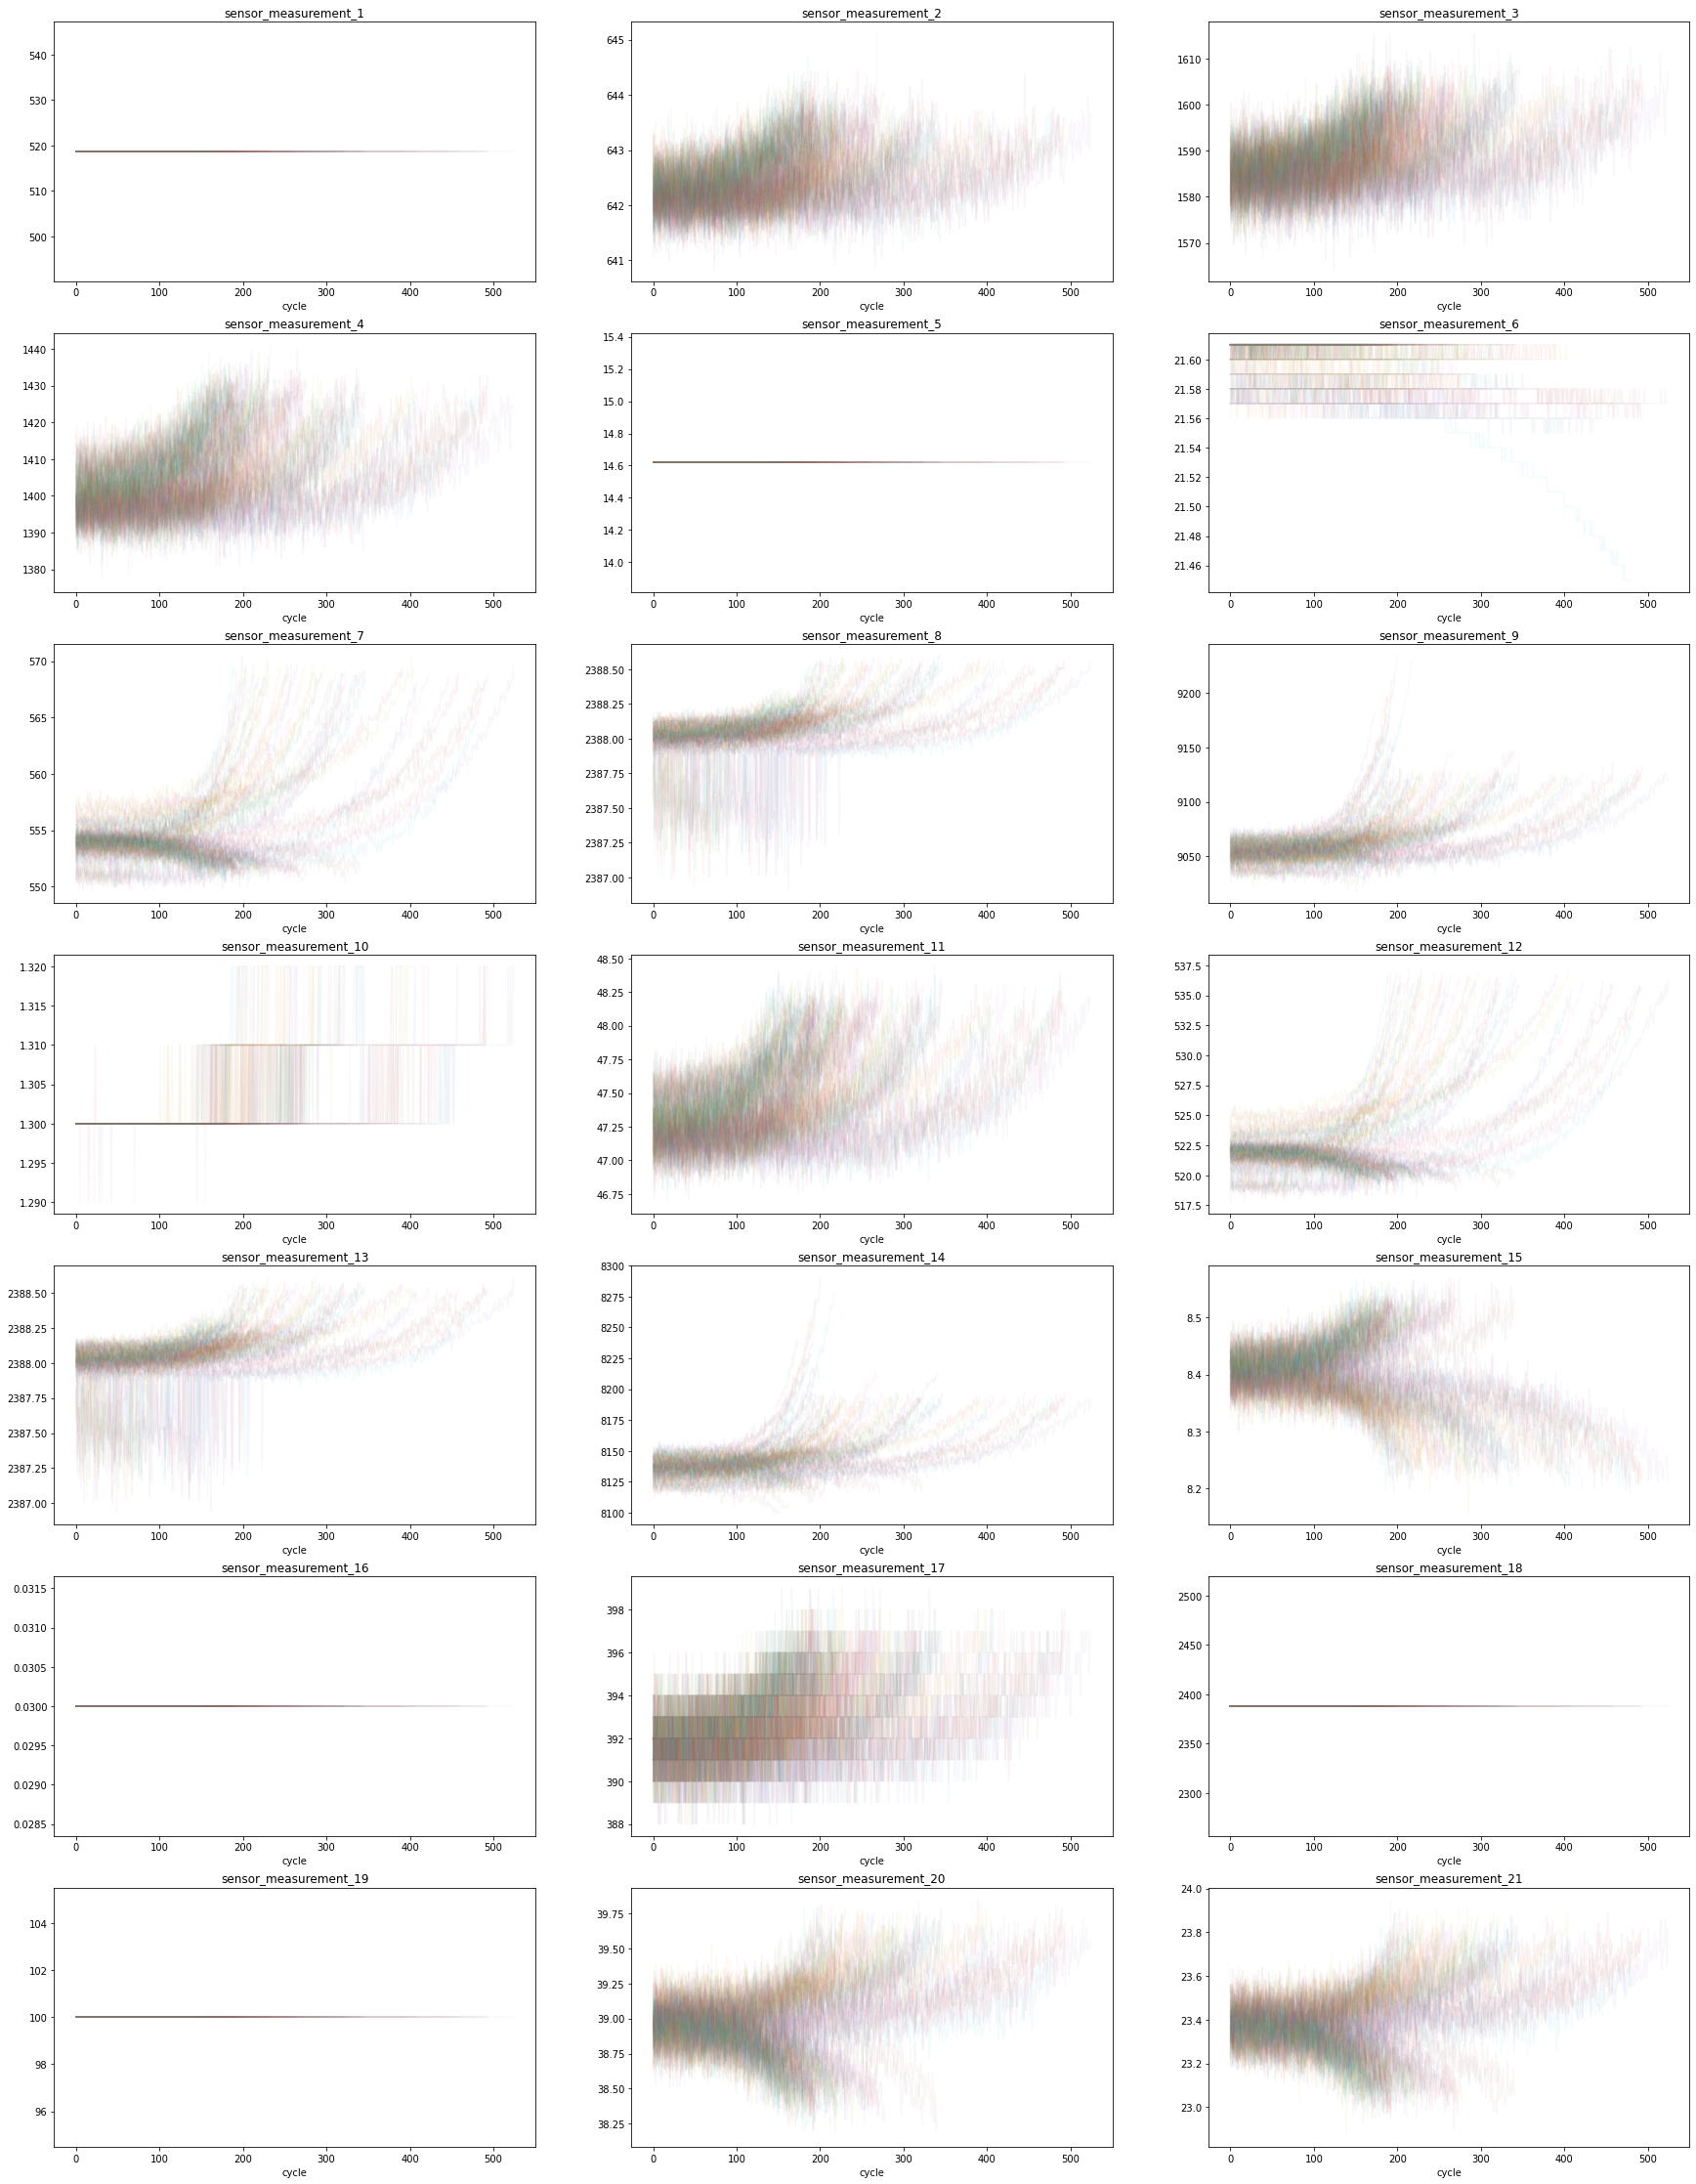

In [17]:
fig, axes = plt.subplots(7, 3, figsize=(30, 40))
axes = axes.ravel()
for i, a in zip(range(1, 22), axes):
    column = 'sensor_measurement_' + str(i)
    _ = a.plot(ddf.loc[['train_FD003.txt', ...], column].unstack(level=[0, 1]).values, alpha=.05)
    a.set_title(column)
    a.set_xlabel('cycle')

# the training data for 2 and 4 have 6 different operational settings and we can see how this effects the measurements here

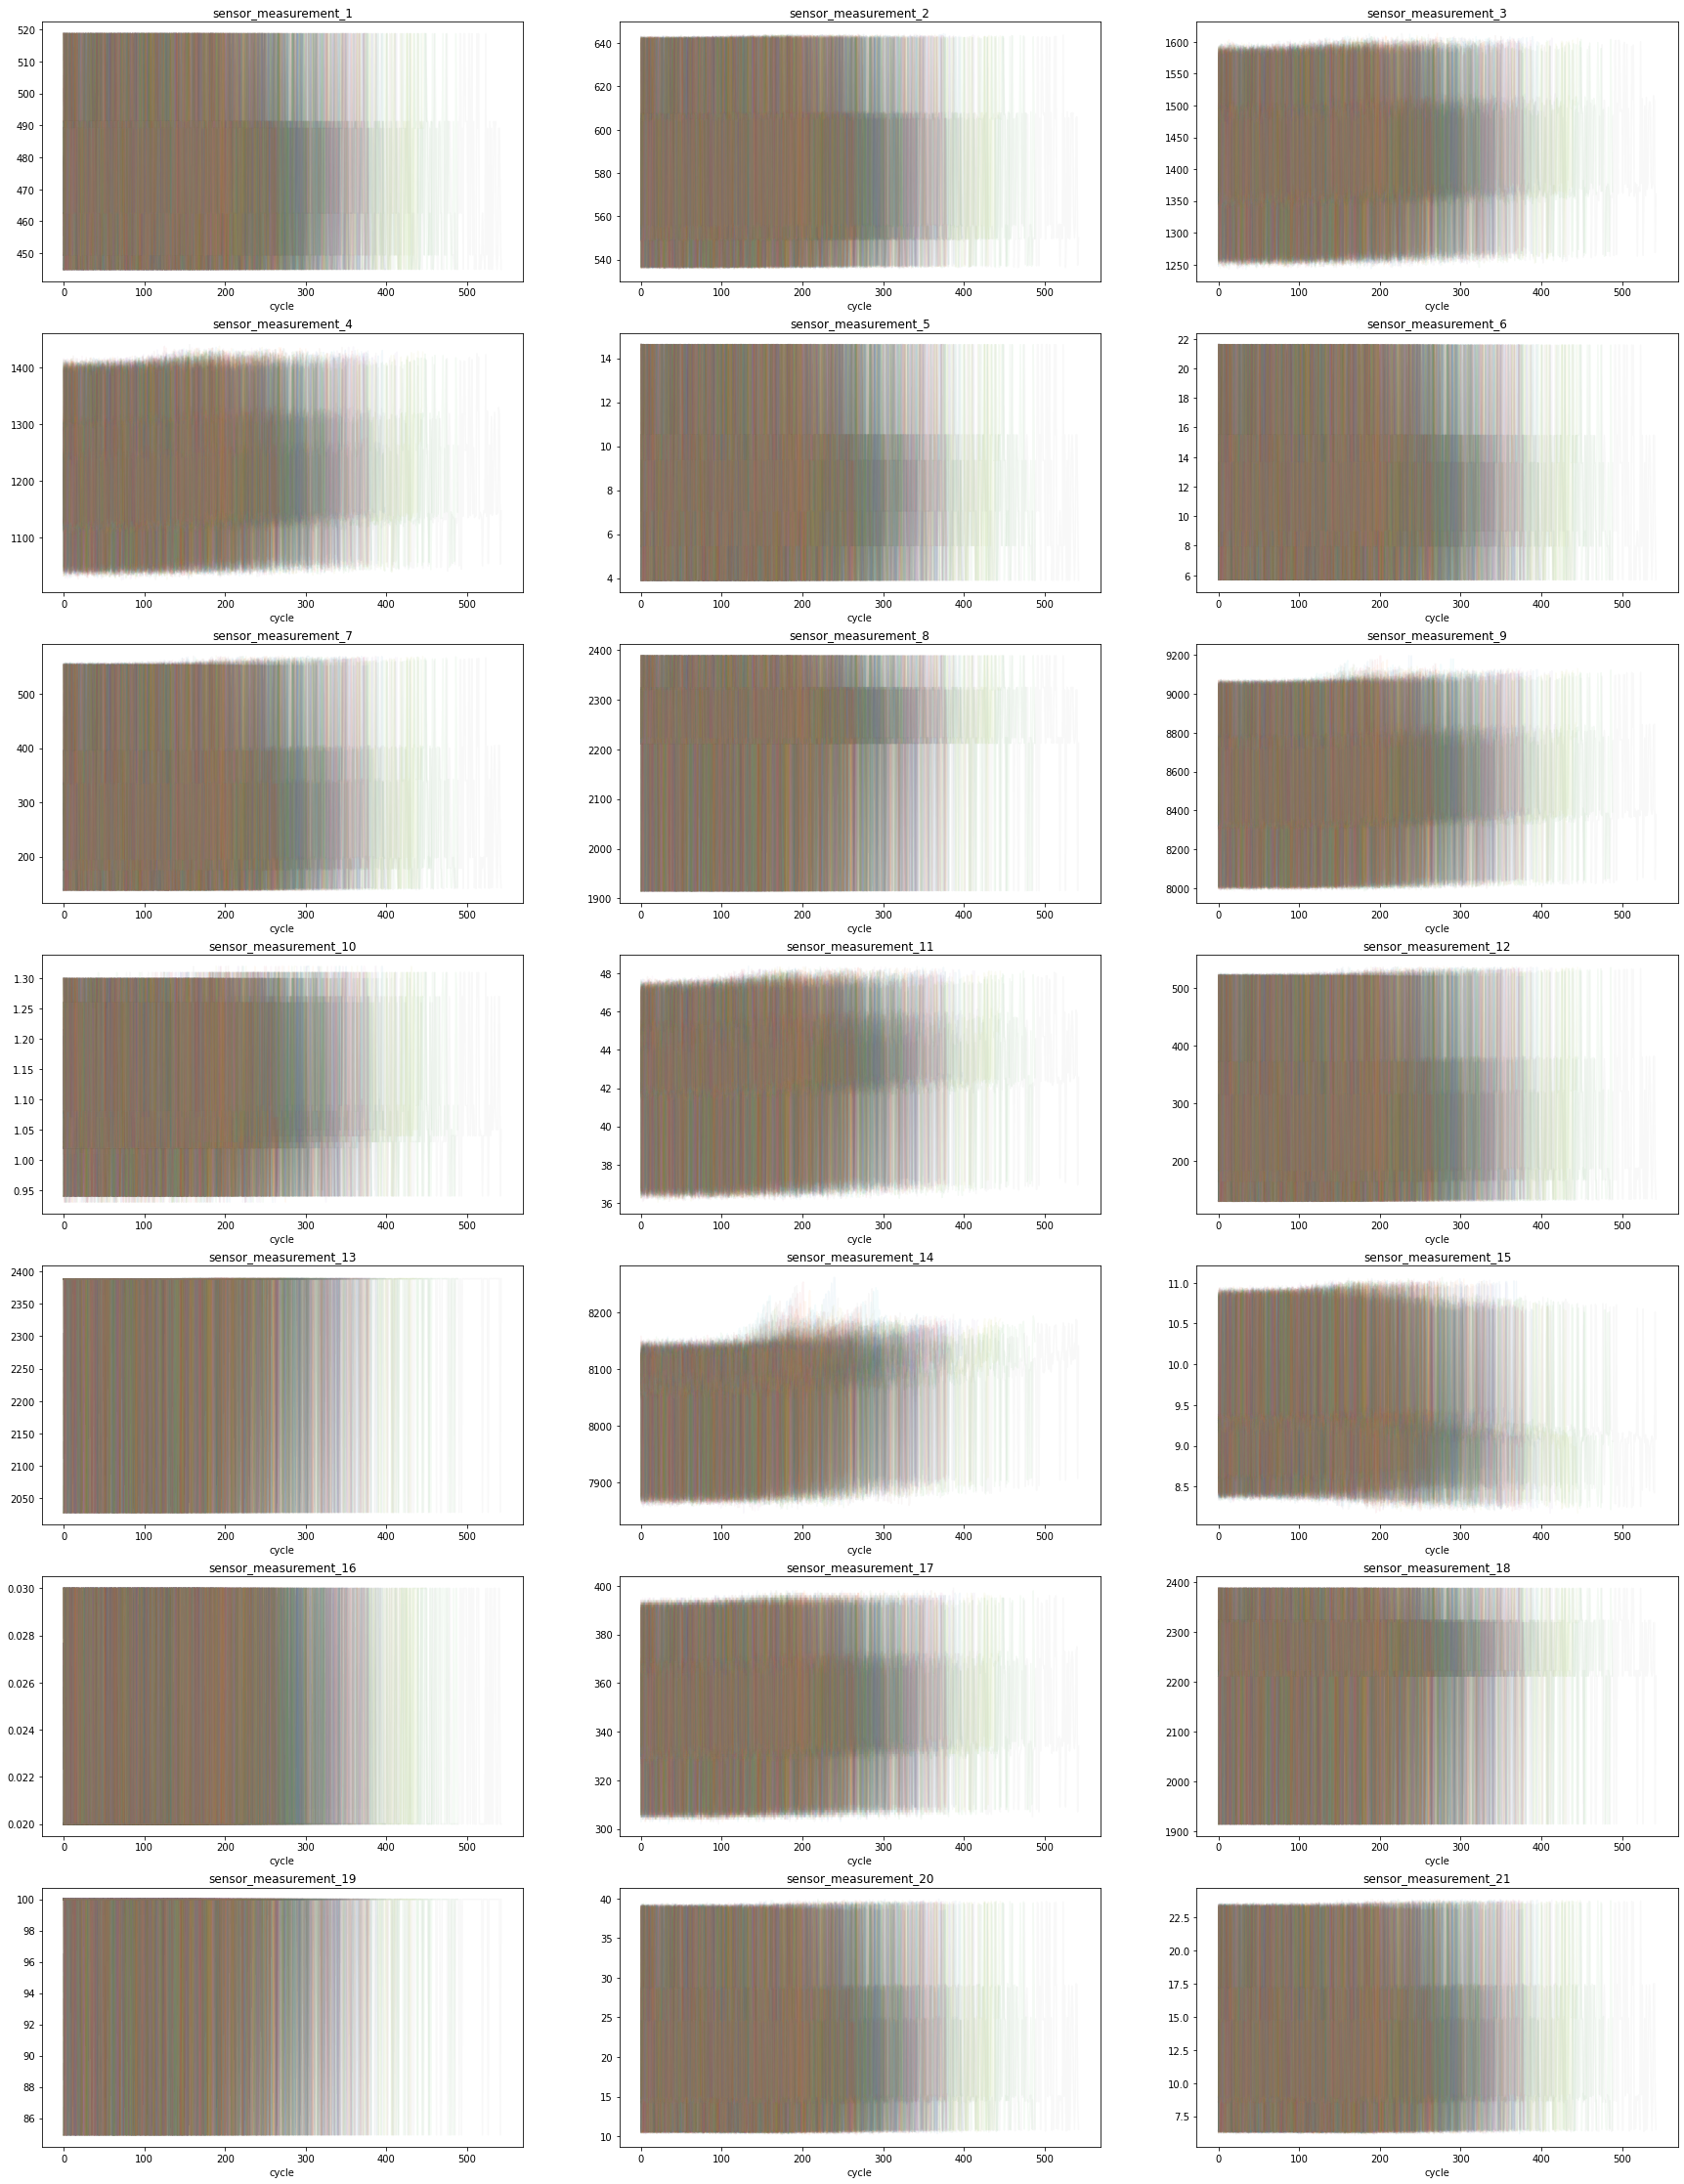

In [18]:
fig, axes = plt.subplots(7, 3, figsize=(30, 40))
axes = axes.ravel()
for i, a in zip(range(1, 22), axes):
    column = 'sensor_measurement_' + str(i)
    _ = a.plot(ddf.loc[['train_FD004.txt', ...], column].unstack(level=[0, 1]).values, alpha=.05)
    a.set_title(column)
    a.set_xlabel('cycle')

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
features = ['cycle', 'op_1', 'op_2',
       'op_3', 'sensor_measurement_1', 'sensor_measurement_2',
       'sensor_measurement_3', 'sensor_measurement_4', 'sensor_measurement_5',
       'sensor_measurement_6', 'sensor_measurement_7', 'sensor_measurement_8',
       'sensor_measurement_9', 'sensor_measurement_10',
       'sensor_measurement_11', 'sensor_measurement_12',
       'sensor_measurement_13', 'sensor_measurement_14',
       'sensor_measurement_15', 'sensor_measurement_16',
       'sensor_measurement_17', 'sensor_measurement_18',
       'sensor_measurement_19', 'sensor_measurement_20',
       'sensor_measurement_21']

In [22]:
import numpy as np

In [23]:
is_train = df.unit_number % 3 != 0
is_test = df.unit_number % 3 == 0

In [24]:
x_train, x_test = df.loc[is_train, features], df.loc[is_test, features]

In [25]:
y_train, y_test = df.loc[is_train, 'failure_cycle'],  df.loc[is_test, 'failure_cycle']

In [26]:
cls = RandomForestRegressor(n_jobs=-1, n_estimators=40, )

In [27]:
cls = cls.fit(x_train, y_train)

In [28]:
cls.score(x_test, y_test)

0.6777656054746929

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
mean_squared_error(y_test, cls.predict(x_test), squared=False)

46.4291275009693

<BarContainer object of 25 artists>

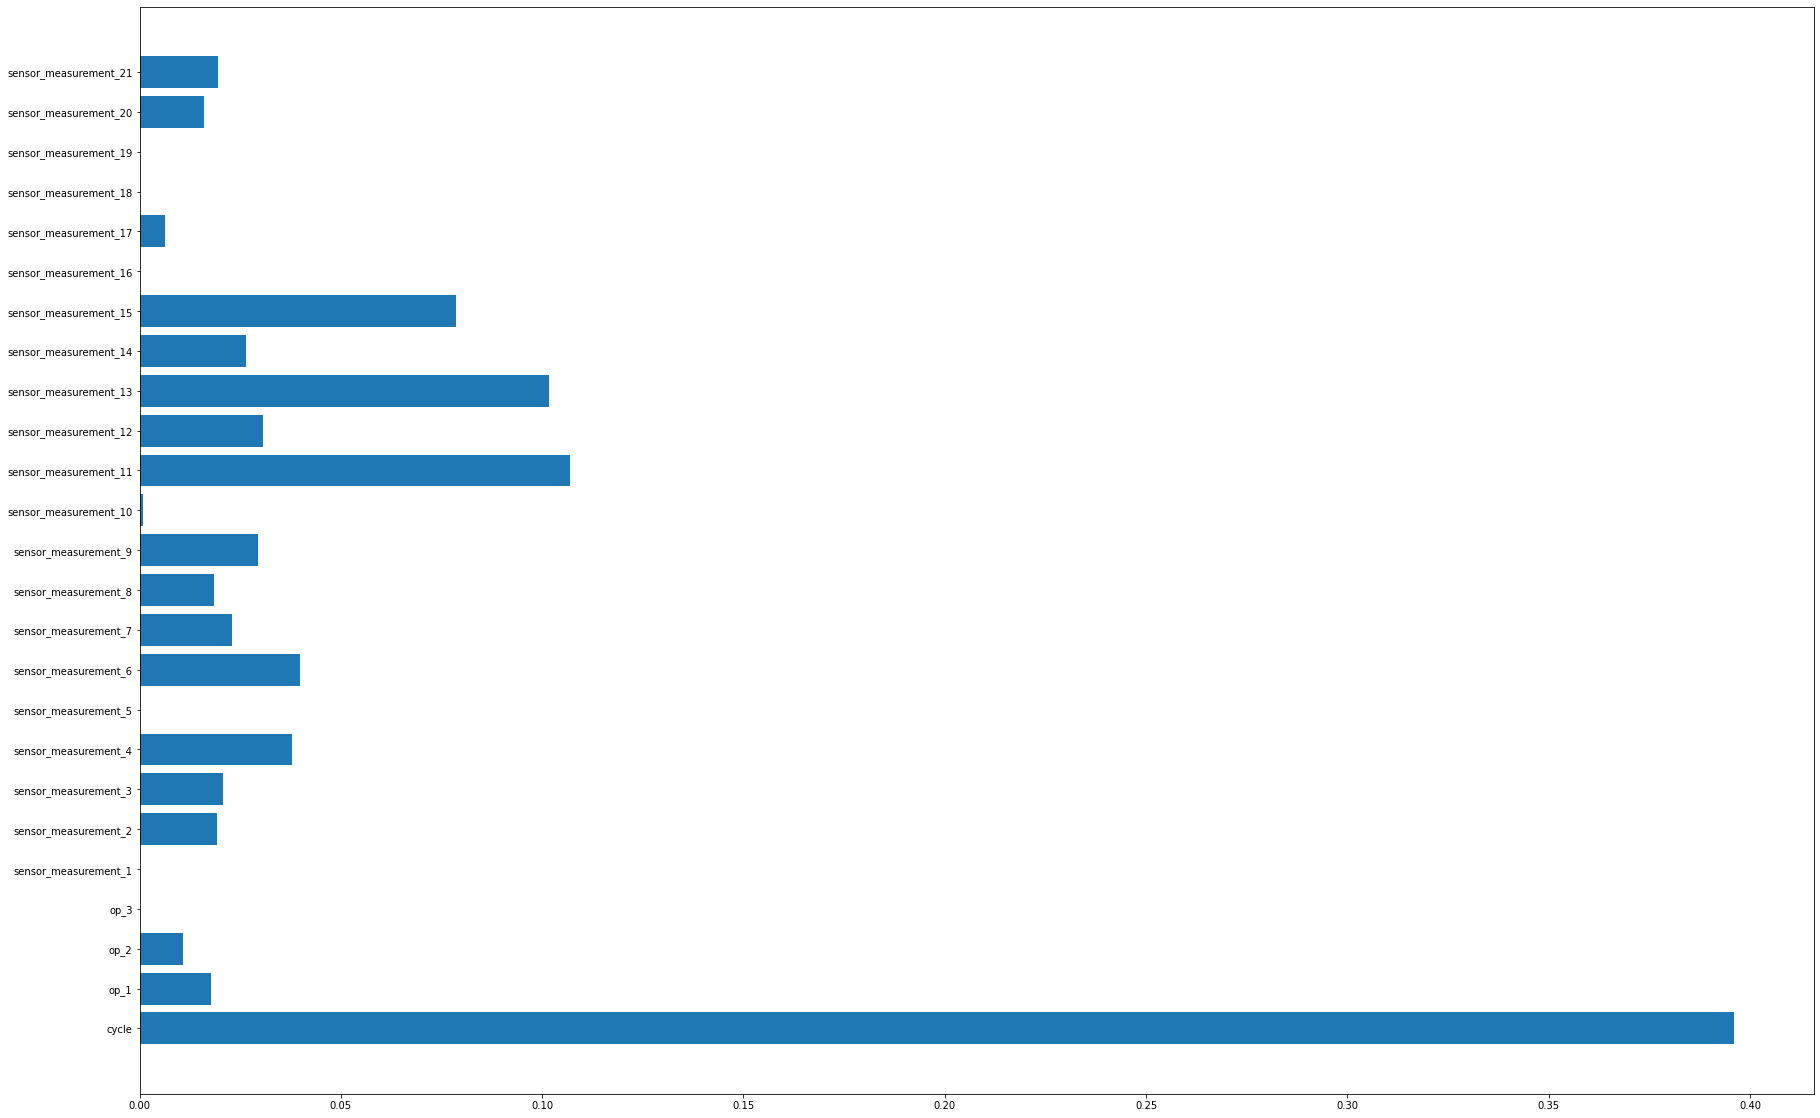

In [31]:
fig, ax = plt.subplots(figsize=(30, 20))
ax.barh(features, cls.feature_importances_)

In [32]:
from sklearn.dummy import DummyRegressor

In [33]:
dummy = DummyRegressor()
dummy = dummy.fit(x_train, y_train)
mean_squared_error(y_test, dummy.predict(x_test), squared=False)

81.9091606758585

# An ensemble based method outperforms a niave mean prediction by ~50% 
* Next steps apply Xgboost, gradient boosting generally outperforms random forest when tuned appropriately
* this approach above validates the potenvalue of 